In [3]:
import sys
import numpy as np
import pandas as pd
sys.path.append( "../../lattice/")
sys.path.append("../")
sys.path.append( "../../impurity/")

from HC_Lattice import HC_Lattice
from DMET_solver import DMET_solver
from Impurity_solver import Impurity_solver
import matplotlib.pyplot as plt
import seaborn
import gmpy2
import scipy
%matplotlib inline

def print_rho(rho,vmin=0,vmax=0.5,name="myfig.eps"):
    plt.figure()
    rho_to_plot = pd.DataFrame((rho))
    rho_to_plot.rename(columns={0:'$A_{up}$',1:'$B_{up}$',2:'$C_{up}$',3:'$D_{up}$',4:'$A_{down}$',5:'$B_{down}$',6:'$C_{down}$',7:'$D_{down}$'}, 
                     inplace=True)
    rho_to_plot.rename(index={0:'$A_{up}$',1:'$B_{up}$',2:'$C_{up}$',3:'$D_{up}$',4:'$A_{down}$',5:'$B_{down}$',6:'$C_{down}$',7:'$D_{down}$'}, 
                     inplace=True)
    print(rho_to_plot)
    seaborn.heatmap(rho_to_plot,cmap="Blues",vmin=vmin,vmax=vmax)
    plt.savefig(name)
    plt.plot()

#Create the lattice
ls=2
lattice = HC_Lattice(height=ls, length=2*ls)
lattice_size=[ls,2*ls]


/home/romain/.conda/envs/DRL/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/romain/.conda/envs/DRL/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


../../mean_field/


## Check the form of the Hamiltonian 


In [2]:
def plot_H(imp_solv):
    plt.figure()
    for n_el in np.arange(4)+1:
        c_i=0
        size_H=int(scipy.special.comb(8,n_el))
        H=np.zeros([size_H,size_H],dtype=complex)
        for i in np.arange(256):
            if(gmpy2.popcount(int(i))==n_el):
                c_j=0
                for j in np.arange(256):
                    if(gmpy2.popcount(int(j))==n_el):
                        H[c_i,c_j]=imp_solv.H[i,j]
                        c_j+=1
                c_i+=1
        plt.subplot(2,2,n_el)
        seaborn.heatmap(np.real(H),vmax=2,vmin=-2,cmap="Blues")
        plt.title(str(n_el))
        [v,w]=scipy.linalg.eigh(H)
        print("Eigen value for n_el = "+str(n_el)+" = "+str(np.min(v)))
    plt.show()

Eigen value for n_el = 1 = -1.61803398874989
Eigen value for n_el = 2 = -3.236067977499788
Eigen value for n_el = 3 = -3.8541019662496896
Eigen value for n_el = 4 = -4.47213595499958


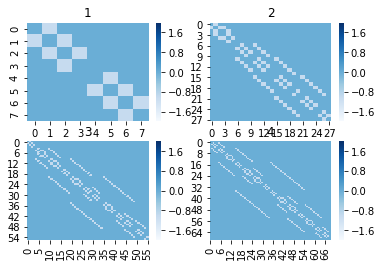

In [3]:
t=1
u=0
imp_solv = Impurity_solver(t, u, 0, np.identity(n=8), lattice_size, [1,2])
plot_H(imp_solv)

Eigen value for n_el = 1 = -1.61803398874989
Eigen value for n_el = 2 = -3.2360679774997925
Eigen value for n_el = 3 = -3.854101966249687
Eigen value for n_el = 4 = -4.472135954999578


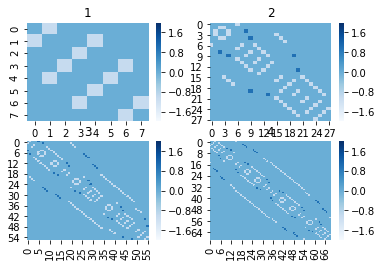

In [4]:
B = np.asarray([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]])
imp_solv = Impurity_solver(t, u, 0, B, lattice_size, [1,2])
plot_H(imp_solv)

Eigen value for n_el = 1 = -1.61803398874989
Eigen value for n_el = 2 = -3.236067977499789
Eigen value for n_el = 3 = -3.854101966249687
Eigen value for n_el = 4 = -4.47213595499958


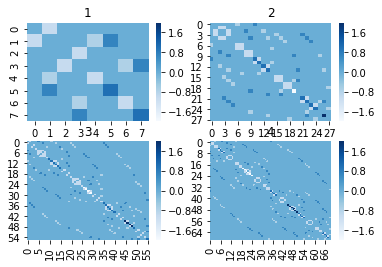

In [5]:
m=1/np.sqrt(2)
B = np.asarray([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,0,m,-m,0,0],[0,0,0,0,m,m,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,0,0,m,-m],[0,0,0,0,0,0,m,m]])
#print(np.around(B,2))
imp_solv = Impurity_solver(t, u, 0, B, lattice_size, [1,2])
plot_H(imp_solv)

In [6]:
# debug the rotation 
T = np.zeros([2*lattice.nb_sites, 2*lattice.nb_sites])
# Iterate over all sites
for i in np.arange(lattice.nb_sites):
    for j in lattice.get_neighbors(i + 1):
        T[j - 1+lattice.nb_sites, i+lattice.nb_sites] = -t
        T[j - 1, i] = -t
print(T)
print(np.around(np.matmul(np.matmul(np.transpose(B),T),B),2))

[[ 0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]]
[[ 0.   -1.    0.    0.    0.    0.    0.    0.  ]
 [-1.    0.    0.    0.   -0.71  0.71  0.    0.  ]
 [ 0.    0.    0.   -1.    0.    0.    0.    0.  ]
 [ 0.    0.   -1.    0.    0.    0.   -0.71  0.71]
 [ 0.   -0.71  0.    0.   -1.   -0.    0.    0.  ]
 [ 0.    0.71  0.    0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.   -0.71  0.    0.   -1.   -0.  ]
 [ 0.    0.    0.    0.71  0.    0.    0.    1.  ]]


## Optimize with DMET

In [7]:
#Create the lattice
ls=2
lattice = HC_Lattice(height=ls, length=2*ls)
# initialize DMET_solver
n=4
print(lattice.lattice)

t=1
u=0
lattice_size=[ls,2*ls]
#solve the system
dms = DMET_solver( t, u, n, lattice_size)


[[1 2 0 0]
 [0 0 3 4]]


In [8]:
dms.solve_system([[1,2],[3,4]])


                $A_{up}$      $B_{up}$      $C_{up}$      $D_{up}$  \
$A_{up}$    5.000000e-01  4.472136e-01  4.613491e-16  2.236068e-01   
$B_{up}$    4.472136e-01  5.000000e-01  2.236068e-01  6.705501e-17   
$C_{up}$    4.613491e-16  2.236068e-01  5.000000e-01  4.472136e-01   
$D_{up}$    2.236068e-01  6.705501e-17  4.472136e-01  5.000000e-01   
$A_{down}$  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
$B_{down}$  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
$C_{down}$  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
$D_{down}$  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              $A_{down}$    $B_{down}$    $C_{down}$    $D_{down}$  
$A_{up}$    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
$B_{up}$    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
$C_{up}$    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
$D_{up}$    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
$A_{down}$  5.000000e-01

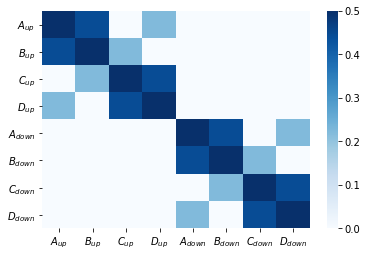

In [9]:
print_rho(np.abs(dms.get_rho_from_u(dms.potential)),name="2sites_big_env_u_0.eps")

## Add the potential 

In [21]:
#Create the lattice
ls=2
lattice = HC_Lattice(height=ls, length=2*ls)
# initialize DMET_solver
n=4
print(lattice.lattice)

t=1
u=10*t
lattice_size=[ls,2*ls]
#solve the system
dms = DMET_solver( t, u, n, lattice_size)


[[1 2 0 0]
 [0 0 3 4]]


In [22]:
dms.solve_system([[1,2],[3,4]])


Optimization terminated successfully.
         Current function value: 0.110942
         Iterations: 24718
         Function evaluations: 29479
Criteria : 
0.11094164887413764
37.28606754284822
Optimization terminated successfully.
         Current function value: 1.180111
         Iterations: 12426
         Function evaluations: 15357
Criteria : 
1.1801110903681622
1834.6445809200256
Optimization terminated successfully.
         Current function value: 0.801362
         Iterations: 257
         Function evaluations: 975
Criteria : 
0.801362278869977
3.190350718893396e-05


            $A_{up}$  $B_{up}$  $C_{up}$  $D_{up}$  $A_{down}$  $B_{down}$  \
$A_{up}$    0.497750  0.139138  0.000210  0.002528    0.005116    0.001079   
$B_{up}$    0.139138  0.502147  0.048746  0.000548    0.001079    0.004152   
$C_{up}$    0.000210  0.048746  0.501264  0.141718    0.000497    0.004535   
$D_{up}$    0.002528  0.000548  0.141718  0.498839    0.000666    0.000687   
$A_{down}$  0.005116  0.001079  0.000497  0.000666    0.497750    0.139138   
$B_{down}$  0.001079  0.004152  0.004535  0.000687    0.139138    0.502147   
$C_{down}$  0.000497  0.004535  0.001832  0.001934    0.000210    0.048746   
$D_{down}$  0.000666  0.000687  0.001934  0.000868    0.002528    0.000548   

            $C_{down}$  $D_{down}$  
$A_{up}$      0.000497    0.000666  
$B_{up}$      0.004535    0.000687  
$C_{up}$      0.001832    0.001934  
$D_{up}$      0.001934    0.000868  
$A_{down}$    0.000210    0.002528  
$B_{down}$    0.048746    0.000548  
$C_{down}$    0.501264    0.141718  
$

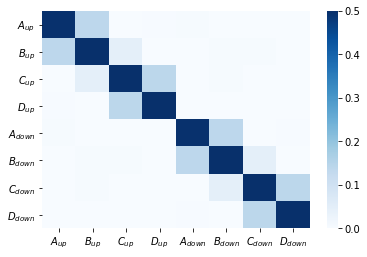

In [23]:
rho_dmet =dms.get_rho_from_u(dms.potential)

print_rho(np.abs(dms.get_rho_from_u(dms.potential)),name="2sites_big_env_u_10t.eps")

## Analytic Solution

In [18]:
ß

                $A_{up}$      $B_{up}$      $C_{up}$      $D_{up}$  \
$A_{up}$    2.499732e-01  2.236168e-01  1.000671e-01  1.118434e-01   
$B_{up}$    2.236168e-01  2.500268e-01  1.118834e-01  1.000671e-01   
$C_{up}$    1.000671e-01  1.118834e-01  2.500268e-01  2.236168e-01   
$D_{up}$    1.118434e-01  1.000671e-01  2.236168e-01  2.499732e-01   
$A_{down}$  5.447434e-27  4.875801e-27  2.176377e-27  2.431407e-27   
$B_{down}$  4.877684e-27  4.366447e-27  8.084872e-30  6.588377e-30   
$C_{down}$  3.038586e-32  8.012663e-31  4.359815e-27  4.874713e-27   
$D_{down}$  2.440294e-27  2.182998e-27  4.878775e-27  5.454066e-27   

              $A_{down}$    $B_{down}$    $C_{down}$    $D_{down}$  
$A_{up}$    5.447434e-27  4.877684e-27  3.038586e-32  2.440294e-27  
$B_{up}$    4.875801e-27  4.366447e-27  8.012663e-31  2.182998e-27  
$C_{up}$    2.176377e-27  8.084872e-30  4.359815e-27  4.878775e-27  
$D_{up}$    2.431407e-27  6.588377e-30  4.874713e-27  5.454066e-27  
$A_{down}$  2.499732e-01

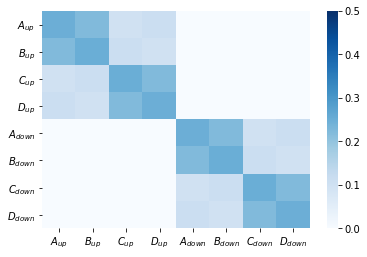

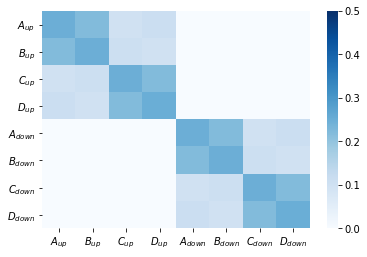

In [19]:
print_rho(np.abs(rho))
rho_dmet = dms.get_rho_from_u(dms.potential)
print_rho(np.abs(rho-rho_dmet))